In [59]:
root_path = 'C:\\Users\\KIM\\Desktop\\minz\\data\\'

# [1] Handle Missing Values
https://www.kaggle.com/alexisbcook/missing-values

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [63]:
data_folder = 'melbourne-housing-market\\input\\'
data = pd.read_csv(root_path + data_folder + 'Melbourne_housing_FULL.csv')

In [64]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [65]:
data.shape

(34857, 21)

In [66]:
data = data[data['Price'].isna() != True]

In [67]:
# target 변수
y = data['Price']
# X 변수에 numeric 만 남기기
melb_predictors = data.drop(['Price'], axis=1) # ref) 컬럼 날리기: drop
x = melb_predictors.select_dtypes(exclude=['object']) # ref) 특정 데이터 타입만 선택

## Train / Test set 생성

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

## MAE 검증 함수 생성
랜덤포레스트 내 mean absolute error 사용

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [70]:
def score_dataset(x_train, x_test, y_train, y_test):
    model = RandomForestRegressor(n_estimators=10,
                                 random_state=0)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    return mean_absolute_error(y_test, preds)

### 1) 삭제
결측값이 무작위인 경우

In [71]:
# ref) 결측값 찾기
cols_with_missing = [col for col in x_train.columns
                    if x_train[col].isnull().any()]

In [72]:
cols_with_missing

['Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [73]:
reduced_x_train = x_train.drop(cols_with_missing, axis=1)
reduced_x_test = x_test.drop(cols_with_missing, axis=1)

In [74]:
print('MAE from Approach 1:\n')
print(score_dataset(reduced_x_train, reduced_x_test, y_train, y_test))

MAE from Approach 1:

392557.36642253055


### 2) 대체 Imputation

In [77]:
from sklearn.impute import SimpleImputer

In [78]:
# Imputation
my_imputer = SimpleImputer(strategy='mean')
imputed_x_train = pd.DataFrame(my_imputer.fit_transform(x_train))
imputed_x_test = pd.DataFrame(my_imputer.fit_transform(x_test))

In [80]:
imputed_x_train.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11
0,3.0,11.2,3046.0,3.0,1.0,1.0,746.0,152.0,1960.0,-37.71051,144.90925,8870.0


In [83]:
# imputation 은 컬럼명을 지움.
imputed_x_train.columns = x_train.columns
imputed_x_test.columns = x_test.columns

In [84]:
print('MAE from Approach 2:\n')
print(score_dataset(imputed_x_train, imputed_x_test, y_train, y_test))

MAE from Approach 2:

195734.90624609287


## 3) Imputation

In [87]:
x_train_plus = x_train.copy()
x_test_plus = x_test.copy()

In [88]:
for col in cols_with_missing:
    x_train_plus[col+'_was_missing'] = x_train_plus[col].isnull()
    x_test_plus[col+'_was_missing'] = x_test_plus[col].isnull()

In [89]:
x_train.head(2)

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
16971,3,11.2,3046.0,3.0,1.0,1.0,746.0,152.0,1960.0,-37.71051,144.90925,8870.0
17383,3,14.5,3087.0,3.0,1.0,1.0,538.0,NaN,NaN,-37.70178,145.08510,1442.0


In [90]:
x_train_plus.head(2)

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,Postcode_was_missing,Bedroom2_was_missing,Bathroom_was_missing,Car_was_missing,Landsize_was_missing,BuildingArea_was_missing,YearBuilt_was_missing,Lattitude_was_missing,Longtitude_was_missing,Propertycount_was_missing
16971,3,11.2,3046.0,3.0,1.0,1.0,746.0,152.0,1960.0,-37.71051,...,False,False,False,False,False,False,False,False,False,False
17383,3,14.5,3087.0,3.0,1.0,1.0,538.0,NaN,NaN,-37.70178,...,False,False,False,False,False,True,True,False,False,False


In [91]:
# Imputation 
my_imputer = SimpleImputer(strategy='mean')
imputed_x_train_plus = pd.DataFrame(my_imputer.fit_transform(x_train_plus))
imputed_x_test_plus = pd.DataFrame(my_imputer.fit_transform(x_test_plus))

imputed_x_train_plus.columns = x_train_plus.columns
imputed_x_test_plus.columns = x_test_plus.columns

In [92]:
print('MAE from Approach 3:\n')
print(score_dataset(imputed_x_train, imputed_x_test, y_train, y_test))

MAE from Approach 3:

195734.90624609287


In [93]:
print(x_train.shape)

(21797, 12)


In [94]:
# ref) 결측 수 세기
missing_val_count_by_column = x_train.isnull().sum()

In [97]:
# portion
round(x_train.isnull().sum() / x_train.shape[0],2)

Rooms            0.00
Distance         0.00
Postcode         0.00
Bedroom2         0.24
Bathroom         0.24
Car              0.25
Landsize         0.34
BuildingArea     0.61
YearBuilt        0.56
Lattitude        0.23
Longtitude       0.23
Propertycount    0.00
dtype: float64

# [2] Data Scale and Normalize
https://www.kaggle.com/rtatman/data-cleaning-challenge-scale-and-normalize-data

In [110]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [111]:
import pandas as pd
import numpy as np

from scipy import stats

# min-max scaling 용
# pip install mlxtend  
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
data_folder = 'kickstarter-projects\\input\\'
data = pd.read_csv(root_path + data_folder + 'ks-projects-201801.csv')

In [112]:
# set seed for reproducibility
np.random.seed(0)

## Scailing
: 데이터의 range를 변경 (0~1까지)  
  사용이유: 데이터 point간의 거리를 측정할 때 scale 필요 (예: SVM, KNN)  
  예) 1달러 <-> 1원, 키 <-> 몸무게   
    
## Normalization
: 데이터의 분포를 변경(정규화: 평균=중앙값, normal distribution = gaussian distribution)  
  사용이유: 정규화를 기본 가정으로 갖는 기법에서 이용. (제곱근, 로그화)    
  예) t-test, anova, linear regression, linear discriminant analysis, gaussian naive bayes.

In [115]:
data.head(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00


### Example : Scailing

In [119]:
usd_goal = data['goal']

In [120]:
# ref) scailing : minmax_scaling
scaled_data = minmax_scaling(usd_goal, columns=[0])

Text(0.5, 1.0, 'Scaled Data')

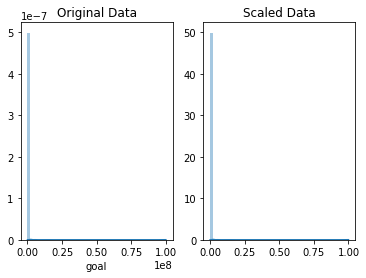

In [121]:
fig, ax = plt.subplots(1,2)
sns.distplot(data['goal'], ax=ax[0])
ax[0].set_title('Original Data')
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title('Scaled Data')

# 소수 캠페인이 독차지

### Example : Normalization

In [125]:
index_of_positive_pledges = data['usd_pledged_real'] > 0 # box-cox 가 양수만 취급

In [126]:
positive_pledges = data['usd_pledged_real'].loc[index_of_positive_pledges] # ref) 인덱스로 데이터 추출

In [131]:
normalized_pledges = stats.boxcox(positive_pledges)[0]

Text(0.5, 1.0, 'Normalized Data')

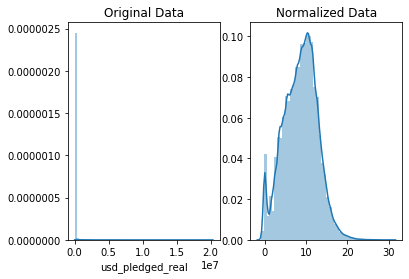

In [134]:
fig, ax = plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized Data")

# [3] Categorical variables
https://www.kaggle.com/alexisbcook/categorical-variables

# [4] Parsing date
https://www.kaggle.com/rtatman/data-cleaning-challenge-parsing-dates/

# [5] Character encoding
https://www.kaggle.com/rtatman/data-cleaning-challenge-character-encodings

# [6] Inconsistent data entry
https://www.kaggle.com/rtatman/data-cleaning-challenge-inconsistent-data-entry/